In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("heart.csv")

df

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [91]:
x = df.drop(columns='chd',axis=1)

x.drop(columns='row.names',axis=1,inplace=True)

x['famhist'] = LabelEncoder().fit_transform(x['famhist'])

y = df.chd


x

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40


<AxesSubplot:>

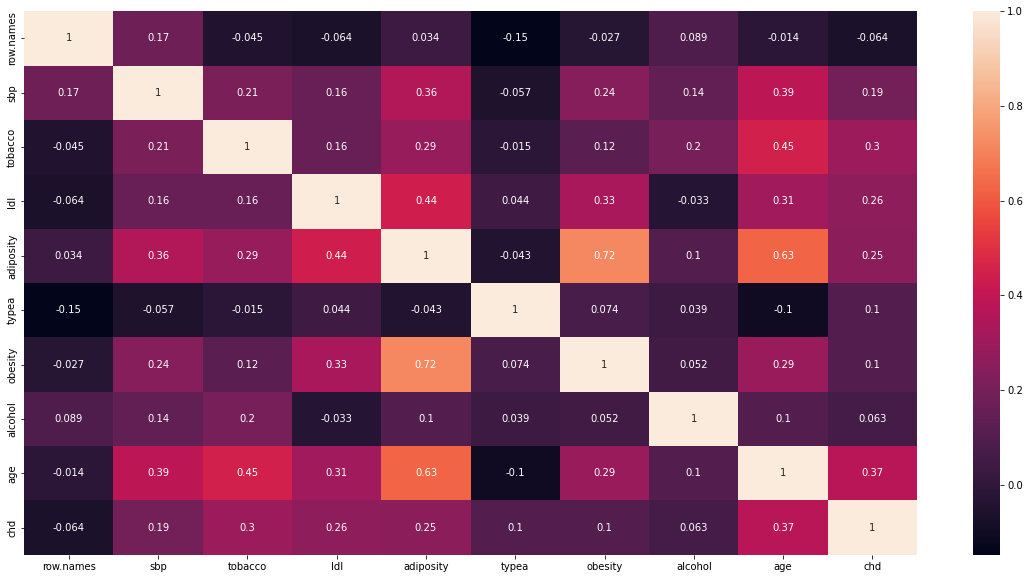

In [92]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap

In [93]:
x = x.drop(columns='sbp')


In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3, random_state=2020,shuffle=True)

X_train.to_csv("heart_train_X.csv")
X_test.to_csv("heart_test_X.csv")
Y_train.to_csv("heart_train_Y.csv")
Y_test.to_csv("heart_test_Y.csv")

In [95]:
model = LogisticRegression(solver='newton-cg',max_iter=200,C=0.0003)
   
    
model.fit(X_train,Y_train)


y_pred = model.predict(X_test)
   
    
score = accuracy_score(y_pred,Y_test)

print('Logistic regression score :',score)

Logistic regression score : 0.7482014388489209
